In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#loading the file from local directory
pima_df = pd.read_csv(r"C:\Users\Rohit Mohanty\Downloads\diabetes.csv")
print(pima_df.shape)

(768, 9)


In [3]:
pima_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
pima_df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [5]:
#Checking for non numeric values in df
#applymap is pd function that applies np.isreal function columnwise
#np.isreal returns true if element is real. Hence ~ is applied at start.

pima_df[~pima_df.applymap(np.isreal).all(1)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [6]:
pima_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [7]:
#Can minimum value of Glucose, BP, ST, Insulin, BMI be 0?
#So lets replace 0 with nan values
pima_df_copy = pima_df.copy(deep=True)
pima_df_copy[['Glucose','BloodPressure', 'SkinThickness','Insulin','BMI']] = pima_df_copy[['Glucose','BloodPressure', 'SkinThickness','Insulin','BMI']].replace(0,np.nan)

pima_df_copy.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

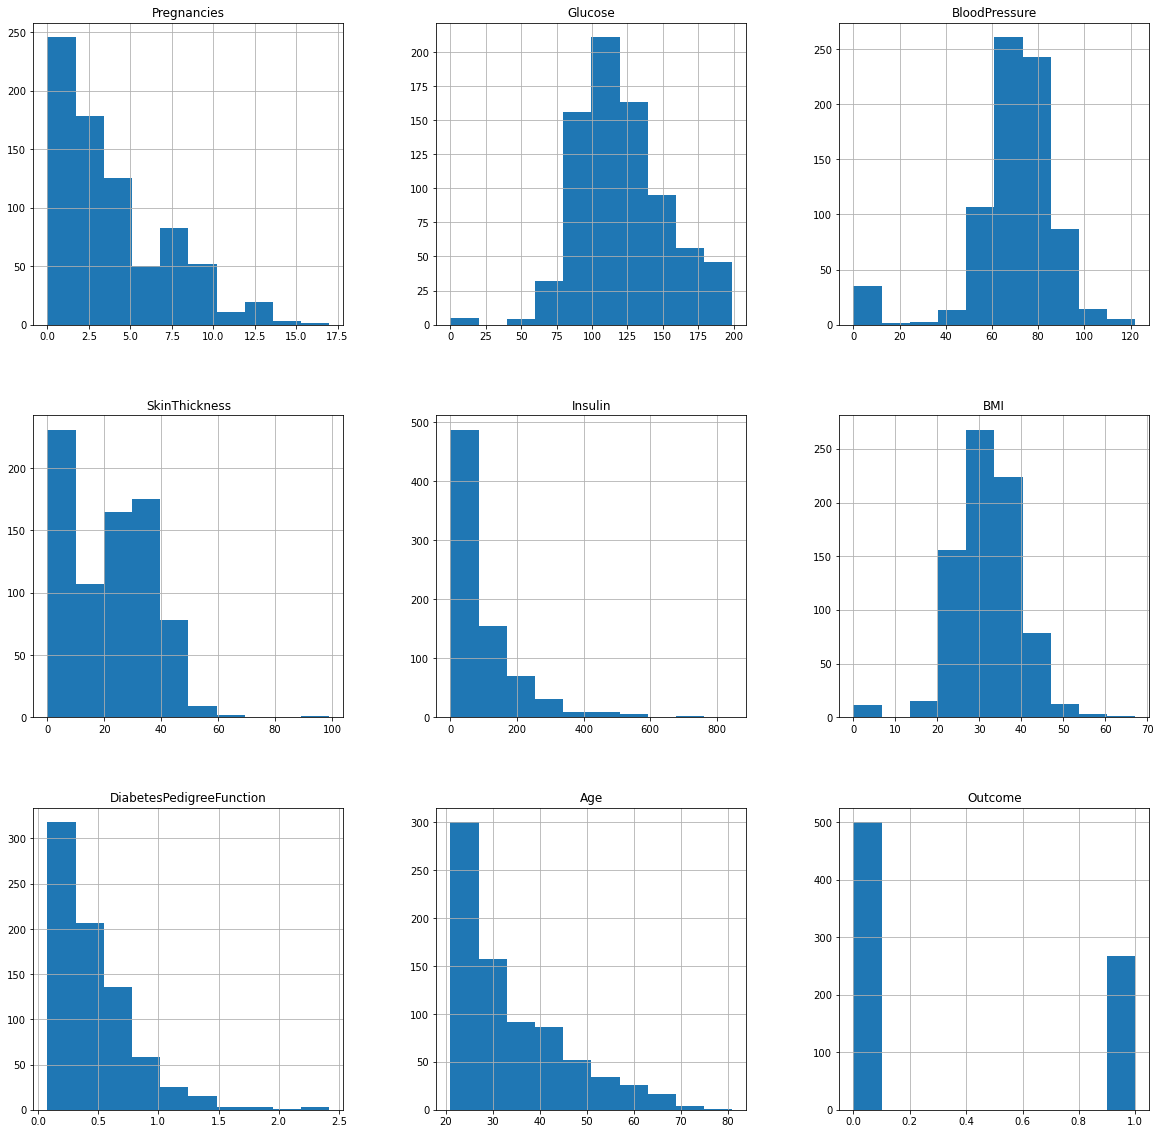

In [8]:
#Data Distribution
pima_df.hist(figsize=(20,20))

In [9]:
#impute nan values for the columns in accordance with their distribution
pima_df_copy['Glucose'].fillna(pima_df_copy['Glucose'].mean(),inplace=True)
pima_df_copy['BloodPressure'].fillna(pima_df_copy['BloodPressure'].mean(),inplace=True)
pima_df_copy['SkinThickness'].fillna(pima_df_copy['SkinThickness'].median(),inplace=True)
pima_df_copy['Insulin'].fillna(pima_df_copy['Insulin'].median(),inplace=True)
pima_df_copy['BMI'].fillna(pima_df_copy['BMI'].median(),inplace=True)

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

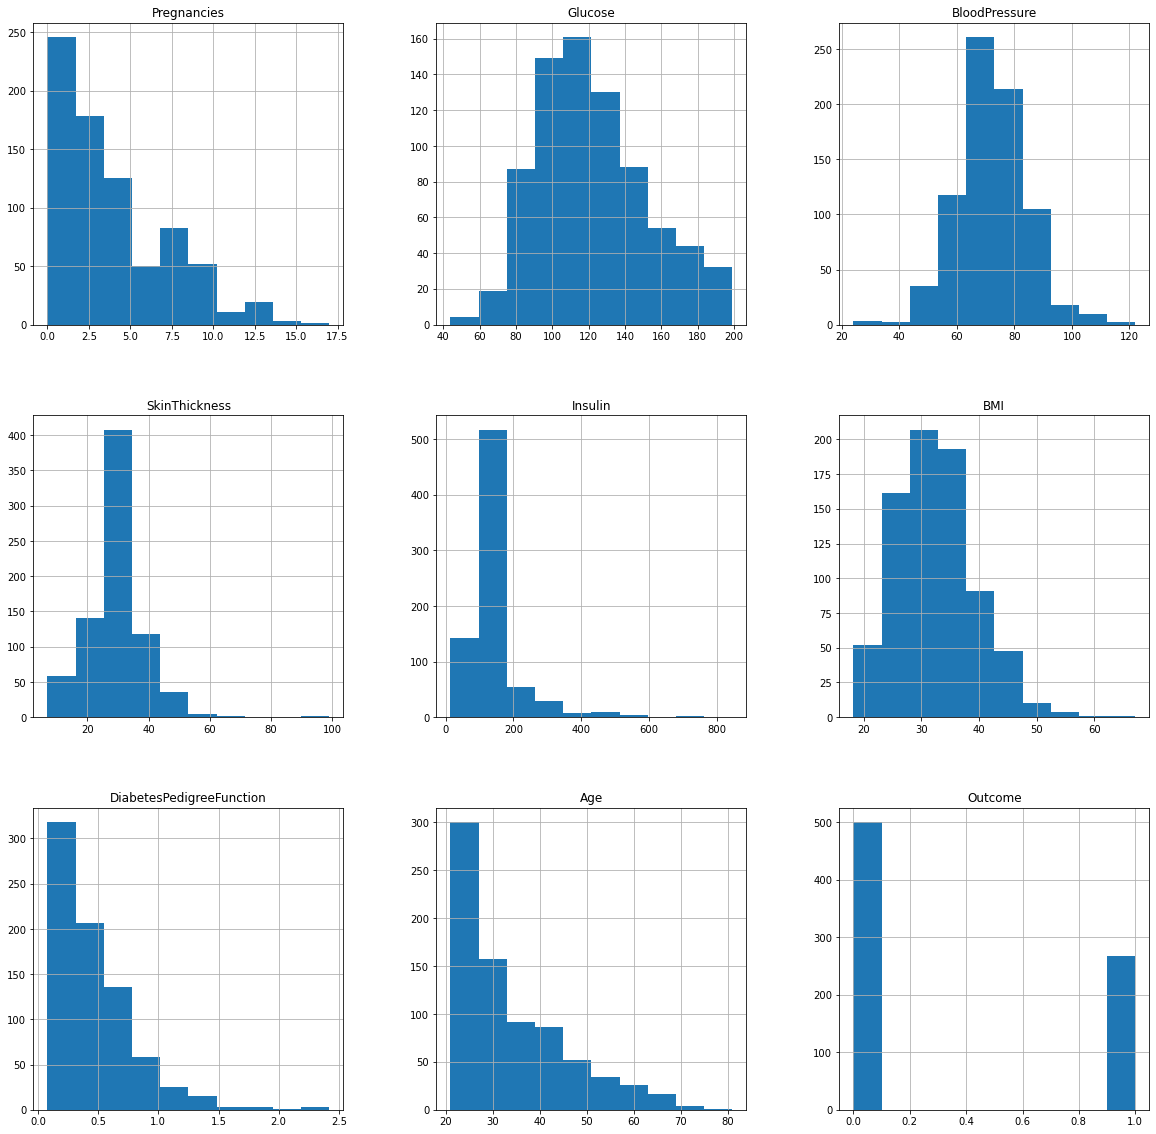

In [10]:
#Plotting after nan removal
pima_df_copy.hist(figsize=(20,20))

In [11]:
#Let us see how data is distributed among 2 different outcomes
pima_df.groupby(['Outcome']).count()

#Here it is observed that most of are non diabetic belong to 0.
#Model ability to predict class 0 will be better than class 1.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,500,500,500,500,500,500,500,500
1,268,268,268,268,268,268,268,268


0    500
1    268
Name: Outcome, dtype: int64


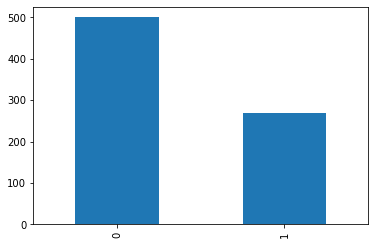

In [12]:
color_wheel = {1: "#0392cf", 
               2: "#7bc043"}
colors = pima_df["Outcome"].map(lambda x: color_wheel.get(x + 1))
print(pima_df.Outcome.value_counts())
p=pima_df.Outcome.value_counts().plot(kind="bar")
#Biasedd towards outcome 0

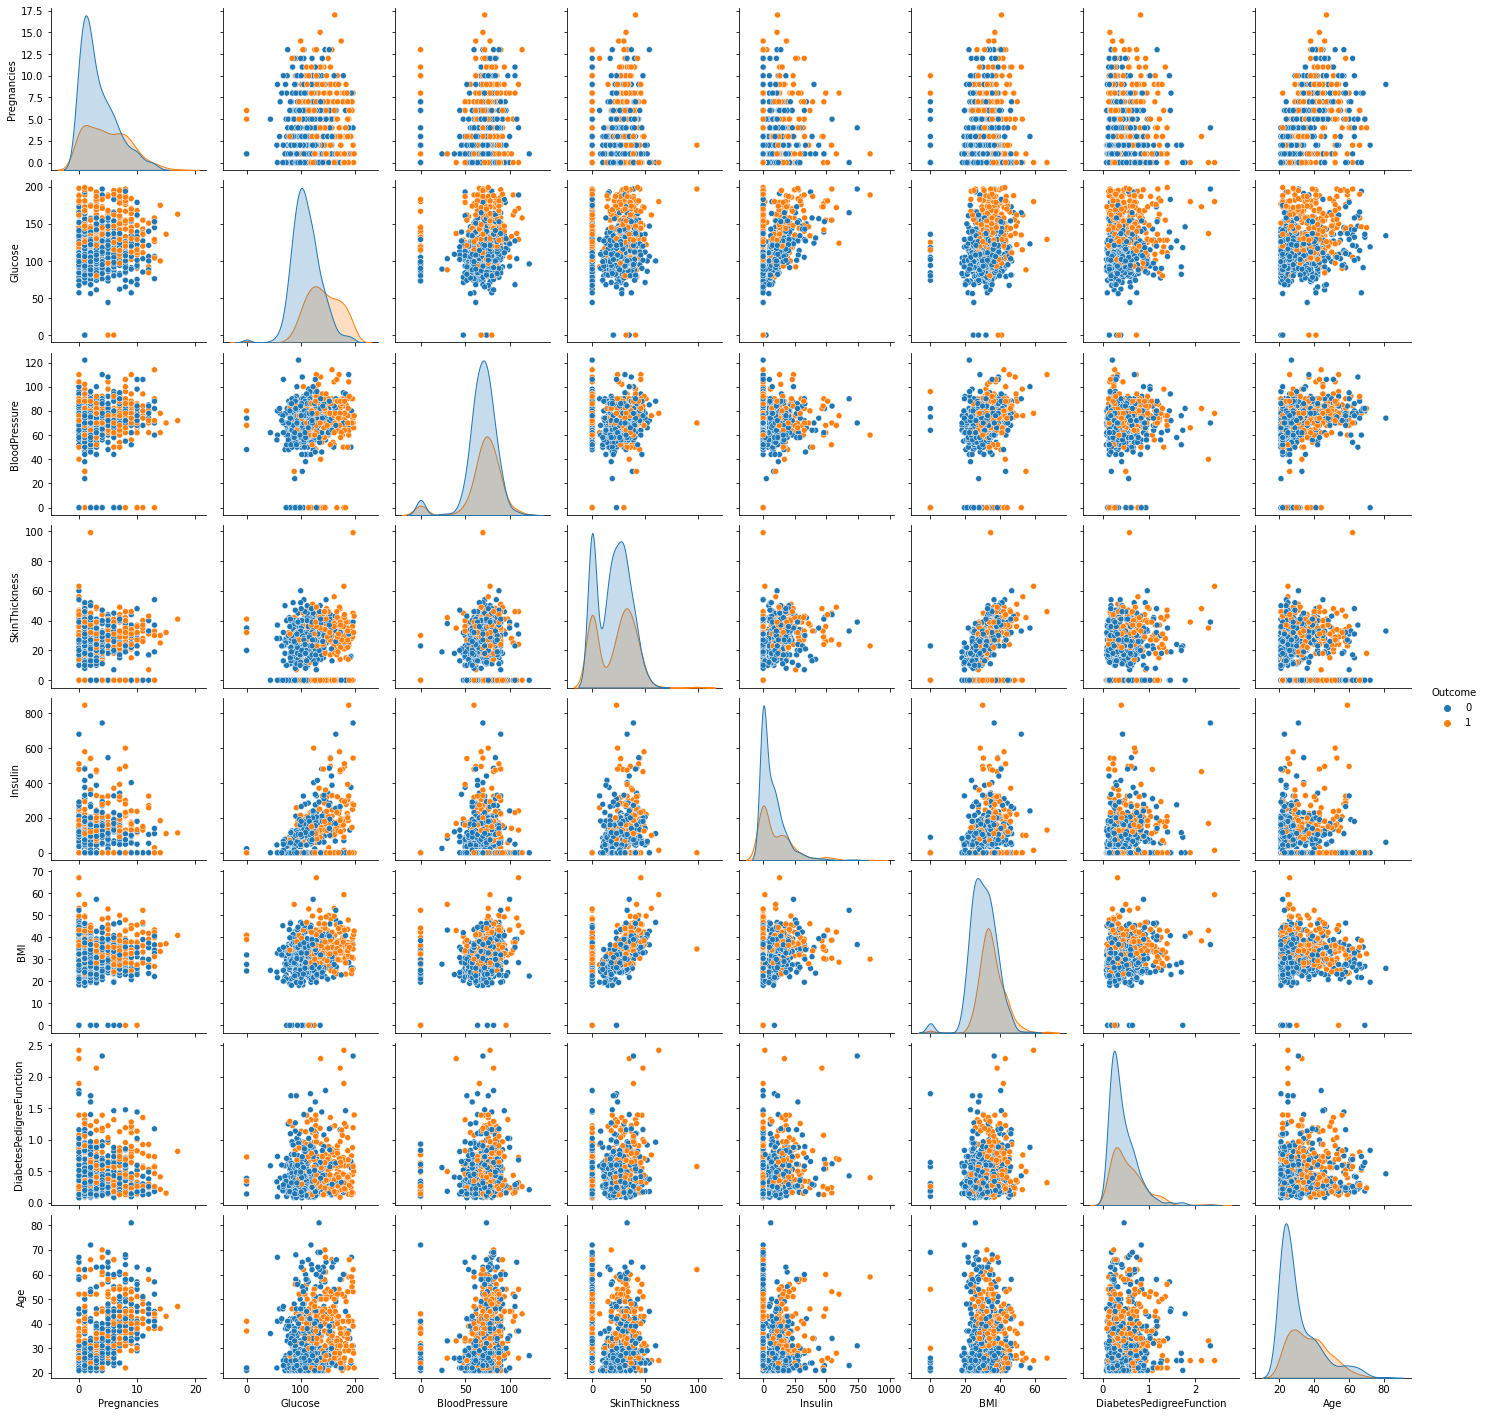

In [13]:
#pairplot for unclean data
sns.pairplot(pima_df, diag_kind='kde', hue='Outcome')

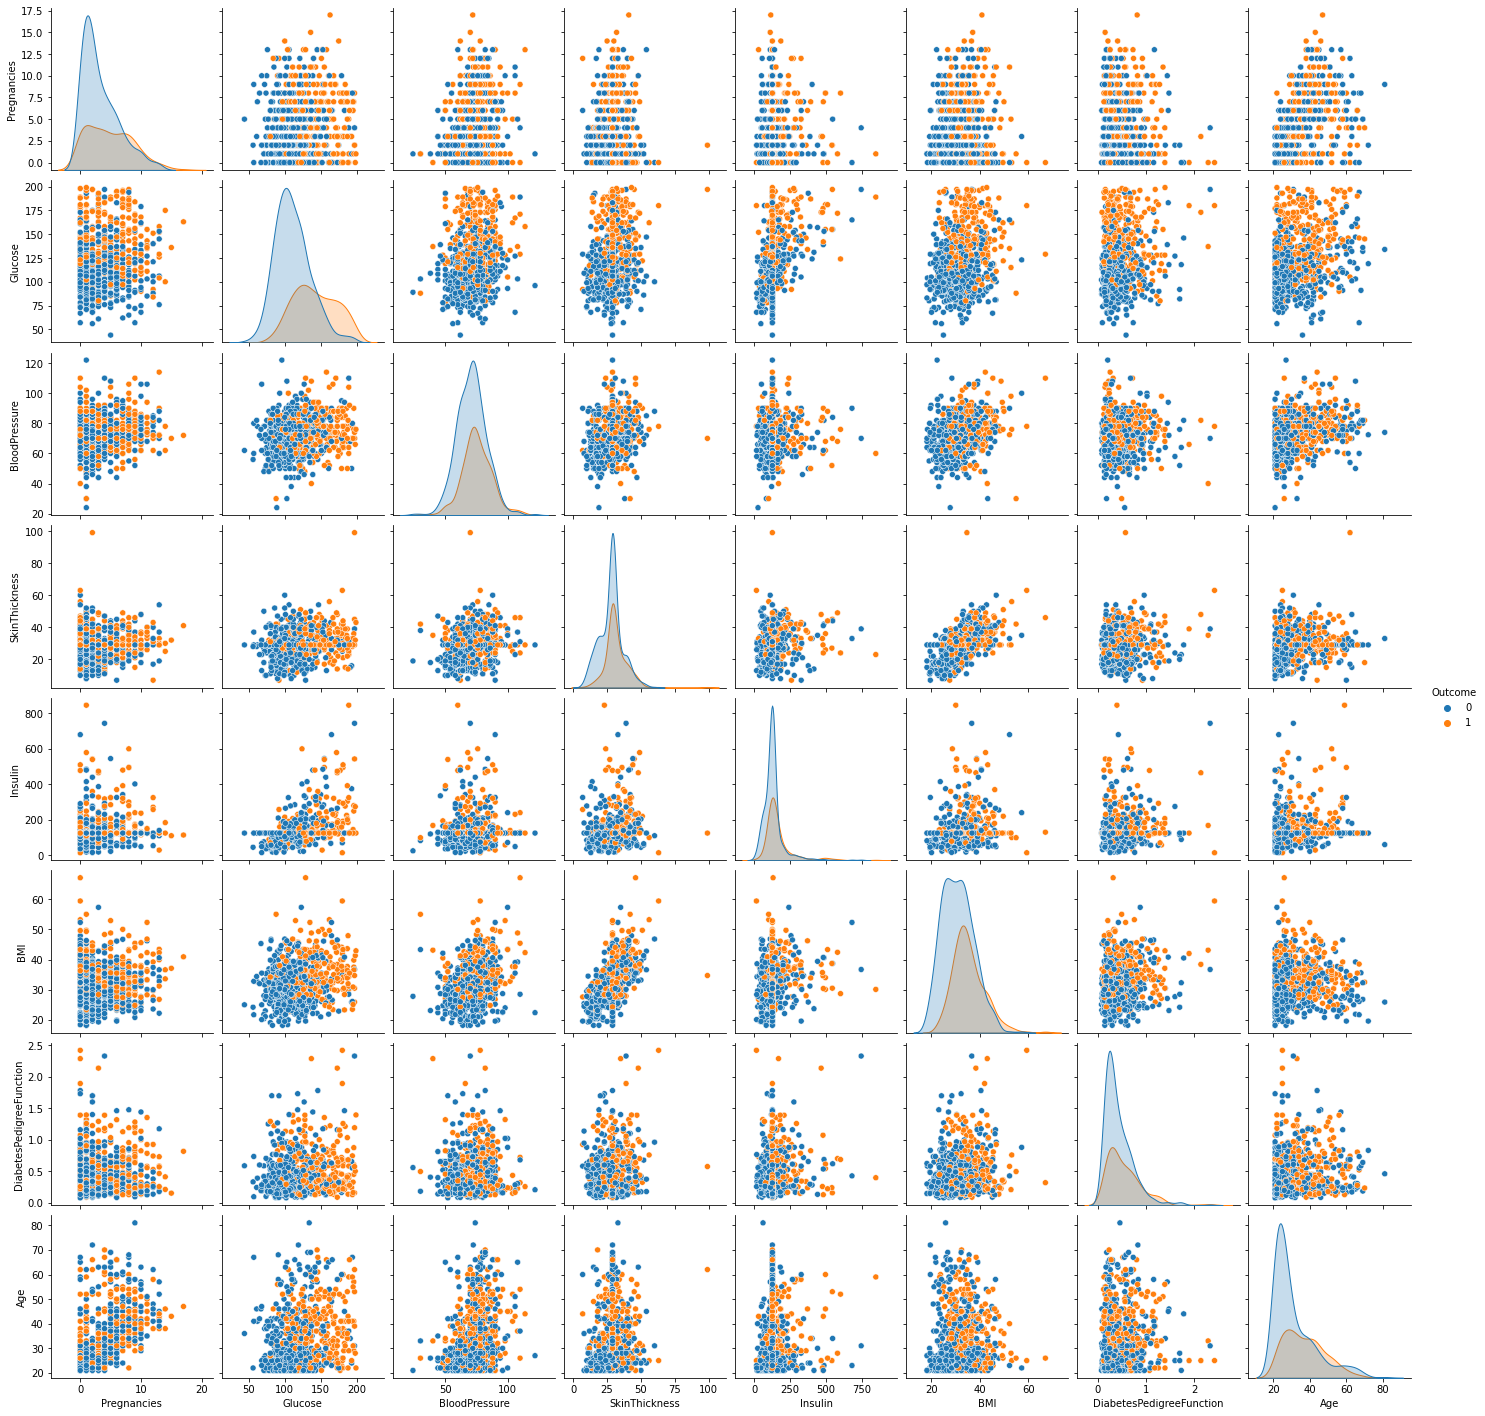

In [14]:
#pai plot for clean data
sns.pairplot(pima_df_copy, diag_kind='kde', hue='Outcome')

<AxesSubplot:>

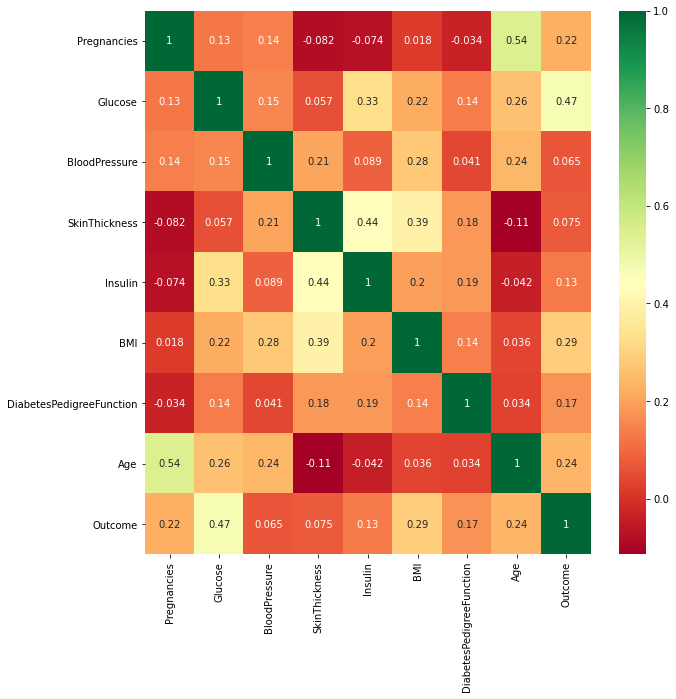

In [15]:
#heatmap for unclean data
plt.figure(figsize=(10,10))
sns.heatmap(pima_df.corr(), annot=True, cmap='RdYlGn')

<AxesSubplot:>

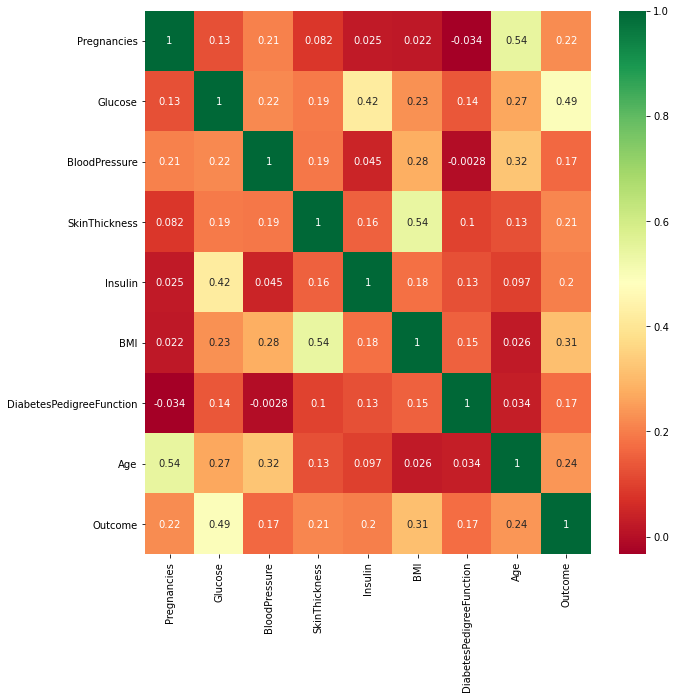

In [16]:
#heatmap for clean data
plt.figure(figsize=(10,10))
sns.heatmap(pima_df_copy.corr(), annot=True, cmap='RdYlGn')

In [17]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = pd.DataFrame(sc_X.fit_transform(pima_df_copy.drop(['Outcome'],axis=1)),columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [18]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,0.670643,0.316566,1.549303,5.484909,-0.020496


In [19]:
y = pima_df_copy.Outcome

In [20]:
#importing train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=1/3, random_state=42,stratify=y)


In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
model = LogisticRegression()
model.fit(X_train,y_train)
y_predict = model.predict(X_test)
model_score = model.score(X_test, y_test)
print(model_score)
print(confusion_matrix(y_test,y_predict))

0.73046875
[[140  27]
 [ 42  47]]


In [34]:
from sklearn.neighbors import KNeighborsClassifier

test_scores = []
train_scores = []

for i in range(1,15):
    
    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [35]:
max_train_score = max(train_scores)
train_scores_ind = [i for i,v in enumerate(train_scores) if v == max_train_score]
print('Max teest score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max teest score 100.0 % and k = [1]


In [36]:
max_test_score = max(test_scores)
test_scores_ind = [i for i,v in enumerate(test_scores) if v == max_test_score]
print('Max teest score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max teest score 76.5625 % and k = [11]


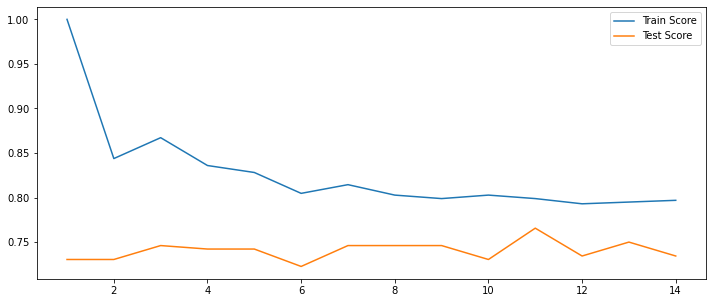

In [37]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,15), train_scores, markers='*', label= 'Train Score')
p = sns.lineplot(range(1,15), test_scores, markers='o', label= 'Test Score')

In [38]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(11)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.765625

In [42]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix
#let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,142,25,167
1,35,54,89
All,177,79,256


Text(0.5, 15.0, 'Predicted label')

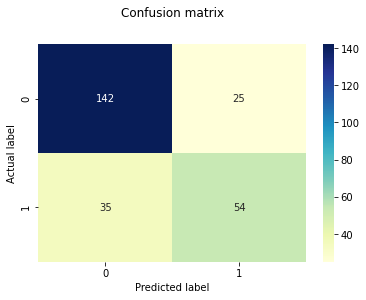

In [43]:
y_pred = knn.predict(X_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [45]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.85      0.83       167
           1       0.68      0.61      0.64        89

    accuracy                           0.77       256
   macro avg       0.74      0.73      0.73       256
weighted avg       0.76      0.77      0.76       256

